In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, f1_score, accuracy_score, plot_roc_curve, roc_auc_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from time import time

<AxesSubplot:>

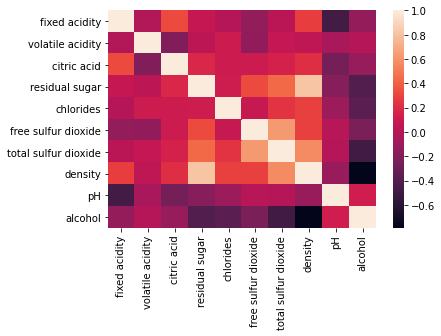

In [2]:
train = pd.read_csv('./data/train.csv', sep=',')
train
train.duplicated().sum()
train = train.drop_duplicates()
train
train.isna().sum()
train["fixed acidity"].fillna(train["fixed acidity"].median(), inplace = True)
train.isna().sum()
train["free sulfur dioxide"].fillna(train["free sulfur dioxide"].median(), inplace = True)
train.isna().sum()
train["alcohol"].fillna(train["alcohol"].median(), inplace = True)
train.isna().sum()
train
train_corr = train.iloc[:,0:10].corr()
sns.heatmap(train_corr)

In [3]:
test = pd.read_csv('./data/test.csv', sep=',')
test
test.duplicated().sum()
test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
alcohol                 0
label                   0
dtype: int64

In [4]:
train_train, train_val = train_test_split(train, test_size = 0.2, random_state = 4211)

In [5]:
lr = LinearRegression()
train_fa = train_train["fixed acidity"]
val_fa = train_val["fixed acidity"]
train_fa = train_fa.values.reshape(-1,1)
val_fa = val_fa.values.reshape(-1,1)
train_d = train_train["density"]
val_d = train_val["density"]
lr.fit(train_fa, train_d)
train_fa_d_pred = lr.predict(val_fa)
print('R^2 score: %.2f' % r2_score(val_d, train_fa_d_pred))

R^2 score: 0.06


In [6]:
train_rs = train_train["residual sugar"]
val_rs = train_val["residual sugar"]
train_rs = train_rs.values.reshape(-1,1)
val_rs = val_rs.values.reshape(-1,1)
lr.fit(train_rs, train_d)
train_rs_d_pred = lr.predict(val_rs)
print('R^2 score: %.2f' % r2_score(val_d, train_rs_d_pred))

R^2 score: 0.67


In [7]:
train_c = train_train["chlorides"]
val_c = train_val["chlorides"]
train_c = train_c.values.reshape(-1,1)
val_c = val_c.values.reshape(-1,1)
lr.fit(train_c, train_d)
train_c_d_pred = lr.predict(val_c)
print('R^2 score: %.2f' % r2_score(val_d, train_c_d_pred))

R^2 score: 0.08


In [8]:
train_fsd = train_train["free sulfur dioxide"]
val_fsd = train_val["free sulfur dioxide"]
train_fsd = train_fsd.values.reshape(-1,1)
val_fsd = val_fsd.values.reshape(-1,1)
lr.fit(train_fsd, train_d)
train_fsd_d_pred = lr.predict(val_fsd)
print('R^2 score: %.2f' % r2_score(val_d, train_fsd_d_pred))

R^2 score: 0.10


In [9]:
train_tsd = train_train["total sulfur dioxide"]
val_tsd = train_val["total sulfur dioxide"]
train_tsd = train_tsd.values.reshape(-1,1)
val_tsd = val_tsd.values.reshape(-1,1)
lr.fit(train_tsd, train_d)
train_tsd_d_pred = lr.predict(val_tsd)
print('R^2 score: %.2f' % r2_score(val_d, train_tsd_d_pred))

R^2 score: 0.31


In [10]:
train_a = train_train["alcohol"]
val_a = train_val["alcohol"]
train_a = train_a.values.reshape(-1,1)
val_a = val_a.values.reshape(-1,1)
lr.fit(train_a, train_d)
train_a_d_pred = lr.predict(val_a)
print('R^2 score: %.2f' % r2_score(val_d, train_a_d_pred))

R^2 score: 0.62


In [11]:
train_all = train_train[["fixed acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "alcohol"]]
val_all = train_val[["fixed acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "alcohol"]]
lr.fit(train_all, train_d)
train_all_d_pred = lr.predict(val_all)
print('R^2 score: %.2f' % r2_score(val_d, train_all_d_pred))

R^2 score: 0.94


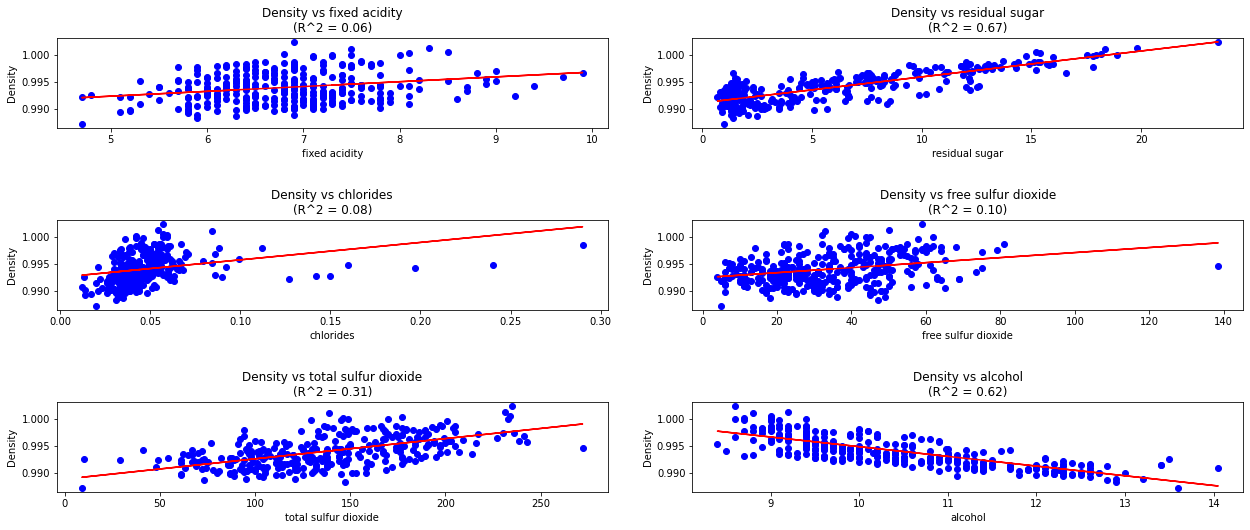

In [12]:
plt.figure(figsize = (18, 8))

plt.subplot(321)
plt.scatter(val_fa, val_d, color = "blue")
plt.plot(val_fa, train_fa_d_pred, color = "red")
plt.xlabel("fixed acidity")
plt.ylabel("Density")
plt.title("Density vs fixed acidity\n(R^2 = %.2f)" % r2_score(val_d, train_fa_d_pred))

plt.subplot(322)
plt.scatter(val_rs, val_d, color = "blue")
plt.plot(val_rs, train_rs_d_pred, color = "red")
plt.xlabel("residual sugar")
plt.ylabel("Density")
plt.title("Density vs residual sugar\n(R^2 = %.2f)" % r2_score(val_d, train_rs_d_pred))

plt.subplot(323)
plt.scatter(val_c, val_d, color = "blue")
plt.plot(val_c, train_c_d_pred, color = "red")
plt.xlabel("chlorides")
plt.ylabel("Density")
plt.title("Density vs chlorides\n(R^2 = %.2f)" % r2_score(val_d, train_c_d_pred))

plt.subplot(324)
plt.scatter(val_fsd, val_d, color = "blue")
plt.plot(val_fsd, train_fsd_d_pred, color = "red")
plt.xlabel("free sulfur dioxide")
plt.ylabel("Density")
plt.title("Density vs free sulfur dioxide\n(R^2 = %.2f)" % r2_score(val_d, train_fsd_d_pred))

plt.subplot(325)
plt.scatter(val_tsd, val_d, color = "blue")
plt.plot(val_tsd, train_tsd_d_pred, color = "red")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Density")
plt.title("Density vs total sulfur dioxide\n(R^2 = %.2f)" % r2_score(val_d, train_tsd_d_pred))

plt.subplot(326)
plt.scatter(val_a, val_d, color = "blue")
plt.plot(val_a, train_a_d_pred, color = "red")
plt.xlabel("alcohol")
plt.ylabel("Density")
plt.title("Density vs alcohol\n(R^2 = %.2f)" % r2_score(val_d, train_a_d_pred))

plt.tight_layout(pad = 3)

In [13]:
train_X = train[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "alcohol"]]
label = train["label"]
train_all = SelectKBest(chi2, k = 10)
train_all_fit = train_all.fit(train_X, label)
col = train_X.columns
for i in range(10):
    print(col[i], train_all.scores_[i])
train_new = SelectKBest(chi2, k = 8).fit_transform(train_X, label)

fixed acidity 3.6849583885179045
volatile acidity 2.7364663152323674
citric acid 0.03423537530047388
residual sugar 250.1380211749334
chlorides 1.554268192766235
free sulfur dioxide 0.3348833232370738
total sulfur dioxide 1573.1849997763782
density 0.0029298532652383864
pH 0.3467455894107143
alcohol 84.76640586655579


In [14]:
s = StandardScaler()
train_new_X = s.fit_transform(train_new)
train_new_train_X, train_new_val_X, train_new_train_Y, train_new_val_Y = train_test_split(train_new_X, label, test_size = 0.2, random_state = 4211)

In [15]:
for step_size in [0.1, 0.01, 0.001, 0.0001]:
    training_time = []
    accuracy = []
    f1score = []
    for r_s in [3456, 4211, 5678]:
        model = SGDClassifier(loss = "log", max_iter = 100, random_state = r_s, eta0 = step_size, learning_rate = "constant", verbose = 0)
        start = time()
        model.fit(train_new_train_X, train_new_train_Y)
        end = time()
        t_t = end - start
        predict = model.predict(train_new_val_X)
        a = accuracy_score(train_new_val_Y, predict)
        f_s = f1_score(train_new_val_Y, predict)
        training_time.append(t_t)
        accuracy.append(a)
        f1score.append(f_s)
    mean_t_t = np.mean(training_time)
    mean_a = np.mean(accuracy)
    mean_f_s = np.mean(f1score)
    sd_t_t = np.std(training_time)
    sd_a = np.std(accuracy)
    sd_f_s = np.std(f1score)
    print("Mean training time for step size = " + str(step_size) + " is %.4f" % mean_t_t)
    print("Standard deviation for training time for step size = " + str(step_size) + " is %.4f" % sd_t_t)
    print("Mean accuracy for step size = " + str(step_size) + " is %.4f" % mean_a)
    print("Standard deviation for accuracy for step size = " + str(step_size) + " is %.4f" % sd_a)
    print("Mean F1 score for step size = " + str(step_size) + " is %.4f" % mean_f_s)
    print("Standard deviation for F1 score for step size = " + str(step_size) + " is %.4f" % sd_f_s)

Mean training time for step size = 0.1 is 0.0033
Standard deviation for training time for step size = 0.1 is 0.0003
Mean accuracy for step size = 0.1 is 0.8292
Standard deviation for accuracy for step size = 0.1 is 0.0058
Mean F1 score for step size = 0.1 is 0.7311
Standard deviation for F1 score for step size = 0.1 is 0.0136
Mean training time for step size = 0.01 is 0.0026
Standard deviation for training time for step size = 0.01 is 0.0005
Mean accuracy for step size = 0.01 is 0.8323
Standard deviation for accuracy for step size = 0.01 is 0.0015
Mean F1 score for step size = 0.01 is 0.7260
Standard deviation for F1 score for step size = 0.01 is 0.0061
Mean training time for step size = 0.001 is 0.0039
Standard deviation for training time for step size = 0.001 is 0.0003
Mean accuracy for step size = 0.001 is 0.8364
Standard deviation for accuracy for step size = 0.001 is 0.0000
Mean F1 score for step size = 0.001 is 0.7389
Standard deviation for F1 score for step size = 0.001 is 0.000

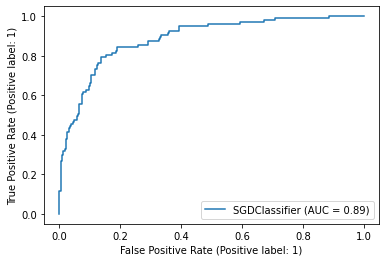

In [16]:
model_best = SGDClassifier(loss = "log", max_iter = 100, eta0 = 0.001, random_state = 5678, learning_rate = "constant", verbose = 0)
model_best.fit(train_new_train_X, train_new_train_Y)
plot_roc_curve(model_best, train_new_val_X, train_new_val_Y)

In [17]:
predict_best = model_best.predict_proba(train_new_val_X)[:, 1]
roc_auc_score(train_new_val_Y, predict_best)

0.8861892002361597

In [18]:
H = [1, 2, 4, 8, 16, 32, 64, 128]
training_time_different = []
m_accuracy_different = []
m_f1score_different = []
s_accuracy_different = []
s_f1score_different = []
for num_of_units in H:
    training_time = []
    m_accuracy = []
    m_f1score = []
    for r_s in [345, 4211, 57]:
        mlp = MLPClassifier(hidden_layer_sizes = (num_of_units, ), random_state = r_s, max_iter = 500, early_stopping = True)
        start = time()
        mlp.fit(train_new_train_X, train_new_train_Y)
        end = time()
        t_t = end - start
        predict = mlp.predict(train_new_val_X)
        a = accuracy_score(train_new_val_Y, predict)
        f_s = f1_score(train_new_val_Y, predict)
        training_time.append(t_t)
        m_accuracy.append(a)
        m_f1score.append(f_s)
    mean_t_t = np.mean(training_time)
    mean_a = np.mean(m_accuracy)
    mean_f_s = np.mean(m_f1score)
    sd_t_t = np.std(training_time)
    sd_a = np.std(m_accuracy)
    sd_f_s = np.std(m_f1score)
    print("Mean training time for " + str(num_of_units) + " hidden units is %.2f" % mean_t_t)
    print("Standard deviation for training time for " + str(num_of_units) + " hidden units is %.2f" % sd_t_t)
    print("Mean accuracy for " + str(num_of_units) + " hidden units is %.2f" % mean_a)
    print("Standard deviation for accuracy for " + str(num_of_units) + " hidden units is %.2f" % sd_a)
    print("Mean F1 score for " + str(num_of_units) + " hidden units is %.2f" % mean_f_s)
    print("Standard deviation for F1 score for " + str(num_of_units) + " hidden units is %.2f" % sd_f_s)
    training_time_different.append(mean_t_t)
    m_accuracy_different.append(mean_a)
    m_f1score_different.append(mean_f_s)
    s_accuracy_different.append(sd_a)
    s_f1score_different.append(sd_f_s)

Mean training time for 1 hidden units is 0.03
Standard deviation for training time for 1 hidden units is 0.00
Mean accuracy for 1 hidden units is 0.57
Standard deviation for accuracy for 1 hidden units is 0.19
Mean F1 score for 1 hidden units is 0.15
Standard deviation for F1 score for 1 hidden units is 0.22
Mean training time for 2 hidden units is 0.09
Standard deviation for training time for 2 hidden units is 0.05
Mean accuracy for 2 hidden units is 0.45
Standard deviation for accuracy for 2 hidden units is 0.11
Mean F1 score for 2 hidden units is 0.50
Standard deviation for F1 score for 2 hidden units is 0.04
Mean training time for 4 hidden units is 0.08
Standard deviation for training time for 4 hidden units is 0.04
Mean accuracy for 4 hidden units is 0.58
Standard deviation for accuracy for 4 hidden units is 0.21
Mean F1 score for 4 hidden units is 0.57
Standard deviation for F1 score for 4 hidden units is 0.08
Mean training time for 8 hidden units is 0.12
Standard deviation for t

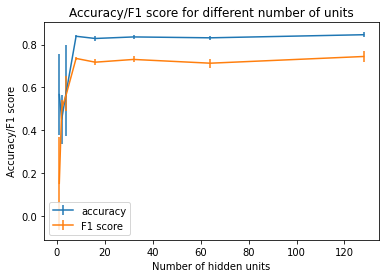

In [19]:
plt.errorbar(H, m_accuracy_different, yerr = s_accuracy_different, label = "accuracy")
plt.errorbar(H, m_f1score_different, yerr = s_f1score_different, label = "F1 score")
plt.title("Accuracy/F1 score for different number of units")
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy/F1 score")
plt.legend()

In [20]:
test_new = test[["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", "alcohol"]]
test_label = test["label"]
test_new_X = s.fit_transform(test_new)
test_new_train_X, test_new_val_X, test_new_train_Y, test_new_val_Y = train_test_split(test_new_X, test_label, test_size = 0.2, random_state = 4211)

In [21]:
params = {"activation": ["logistic", "tanh", "relu"],
          "solver": ["sgd", "adam"],
          "learning_rate_init": [0.1, 0.01],
          "random_state": [4211],
          "max_iter": [500],
          "early_stopping": [True]
          }
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid = params, cv = 5, verbose = 3)
grid_search.fit(train_new_train_X, train_new_train_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.2s
[CV 2/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.2s
[CV 3/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 4/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 5/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 1/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=adam; total time=   0.1s
[CV 2/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, m

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'early_stopping': [True],
                         'learning_rate_init': [0.1, 0.01], 'max_iter': [500],
                         'random_state': [4211], 'solver': ['sgd', 'adam']},
             verbose=3)

In [22]:
def report(results, n_top = 3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results["mean_test_score"][candidate],
                          results["std_test_score"][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.854 (std: 0.028)
Parameters: {'activation': 'relu', 'early_stopping': True, 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.850 (std: 0.022)
Parameters: {'activation': 'relu', 'early_stopping': True, 'learning_rate_init': 0.01, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.846 (std: 0.026)
Parameters: {'activation': 'logistic', 'early_stopping': True, 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}



In [24]:
model_best = MLPClassifier(activation = "relu", solver = "sgd", early_stopping = True, learning_rate_init = 0.1, max_iter = 500, random_state = 4211)
model_best.fit(train_new_train_X, train_new_train_Y)
predict = model_best.predict(test_new_X)
t_accuracy = accuracy_score(test_label, predict)
t_f1score = f1_score(test_label, predict)
print(t_accuracy)
print(t_f1score)

0.8575
0.7896678966789668


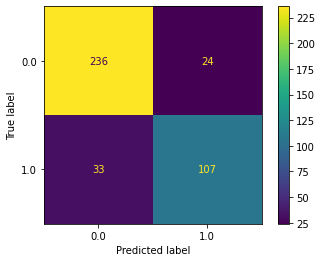

In [25]:
plot_confusion_matrix(model_best, test_new_X, test_label)

In [26]:
count_class_0, count_class_1 = train["label"].value_counts()
train_class_0 = train[train["label"] == 0]
train_class_1 = train[train["label"] == 1]
train_class_1_over = train_class_1.sample(count_class_0, random_state = 4211, replace=True)
train_test_over = pd.concat([train_class_0, train_class_1_over], axis=0)

In [27]:
train_test_over_X = train_test_over[["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH", "alcohol"]]
train_test_over_Y = train_test_over["label"]
train_over_X = s.fit_transform(train_test_over_X)
params = {"activation": ["logistic", "tanh", "relu"],
          "solver": ["sgd", "adam"],
          "learning_rate_init": [0.1, 0.01],
          "random_state": [4211],
          "max_iter": [500],
          "early_stopping": [True]
          }
mlp = MLPClassifier()
grid_search_2 = GridSearchCV(mlp, param_grid = params, cv = 5, verbose = 3)
grid_search_2.fit(train_over_X, train_test_over_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 2/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 3/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 4/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 5/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=sgd; total time=   0.1s
[CV 1/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, max_iter=500, random_state=4211, solver=adam; total time=   0.3s
[CV 2/5] END activation=logistic, early_stopping=True, learning_rate_init=0.1, m

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'early_stopping': [True],
                         'learning_rate_init': [0.1, 0.01], 'max_iter': [500],
                         'random_state': [4211], 'solver': ['sgd', 'adam']},
             verbose=3)

In [28]:
report(grid_search_2.cv_results_)

Model with rank: 1
Mean validation score: 0.863 (std: 0.039)
Parameters: {'activation': 'relu', 'early_stopping': True, 'learning_rate_init': 0.01, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.858 (std: 0.032)
Parameters: {'activation': 'relu', 'early_stopping': True, 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.857 (std: 0.021)
Parameters: {'activation': 'tanh', 'early_stopping': True, 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}



In [29]:
model_best = MLPClassifier(activation = "relu", solver = "adam", early_stopping = True, learning_rate_init = 0.01, max_iter = 500, random_state = 4211)
model_best.fit(train_over_X, train_test_over_Y)
predict = model_best.predict(test_new_X)
t_accuracy = accuracy_score(test_label, predict)
t_f1score = f1_score(test_label, predict)
print(t_accuracy)
print(t_f1score)

0.8425
0.7987220447284346


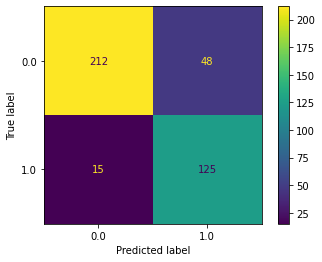

In [30]:
plot_confusion_matrix(model_best, test_new_X, test_label)